In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import universality
from universality import stats
import bilby
import seaborn as sns
import temperance as tmpy
from temperance.core import result
from temperance.core.result import EoSPosterior


from temperance.plotting import corner




Matplotlib is building the font cache; this may take a moment.


In [4]:
samples_paths = {"170817":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/LVC_GW170817_PhenomPNRT-lo_eos.csv", 
                "190425":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/LVC_GW190425_PhenomPNRT-lo_eos.csv",
                "Fonseca":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/Fonseca_J0740_eos.csv",
                "Antoniadis":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/Antoniadis_J0348_eos.csv",
                "J0030": "/home/isaac.legred/New_NICER/NSTOVMaxAnalysis/NewCalcSamples/Miller_J0030_three-spot_eos.csv",
                "J0740": "/home/isaac.legred/New_NICER/NSTOVMaxAnalysis/NewCalcSamples/Miller_J0740_eos.csv"}

additional_properties = pd.read_csv("/home/isaac.legred/PTAnalysis/Analysis/corrected_np_all_post.csv")



In [5]:
plottable_columns = {}
plottable_columns["Mmax"] = corner.PlottableColumn(name="Mmax",
                                     label=corner.get_default_label("Mmax"),
                                     plot_range=(1.8, 3.1),
                                     bandwidth=.05)
plottable_columns["R1p4"] = corner.PlottableColumn(name="R(M=1.4)",
                                     label=corner.get_default_label("R(M=1.4)"),
                                     plot_range=(8.0, 17.0),
                                     bandwidth=.2)
plottable_columns["Lambda1p4"] = corner.PlottableColumn(name="Lambda(M=1.4)",
                                     label="$\Lambda_{1.4}$",
                                     plot_range=(0.0, 2e3),
                                     bandwidth=15)


In [6]:
J0740_eos_likelihood = EoSPosterior.from_csv(samples_paths["J0740"])

In [7]:
J0740_eos_likelihood.weight_columns_available[0].is_log = True
log_marg_weight= result.WeightColumn(name='logmargweight', is_log=True, is_inverted=False)

In [8]:
plottable_samples = {"J0740" : corner.PlottableSamples(label="J0740", posterior=J0740_eos_likelihood, 
                                                       weight_columns_to_use=[log_marg_weight], 
                                                       additional_properties=additional_properties, color="b")}

In [9]:
plottable_samples

{'J0740': PlottableSamples(label='J0740', posterior=<temperance.core.result.EoSPosterior object at 0x7f5bf8fad820>, weight_columns_to_use=[WeightColumn(name='logmargweight', is_log=True, is_inverted=False)], additional_properties=              eos  logweight_total      Mmax  \
 0       2265967.0             -inf  1.700984   
 1        264698.0             -inf  1.590114   
 2       1683176.0             -inf  0.402205   
 3        696150.0             -inf  0.860414   
 4        275937.0             -inf  1.236473   
 ...           ...              ...       ...   
 319993   280847.0             -inf  0.906045   
 319994   459317.0             -inf  0.590972   
 319995  2234499.0             -inf  1.665527   
 319996  2285403.0             -inf  1.415895   
 319997  1340918.0             -inf  0.559531   
 
         pressurec2(baryon_density=2.8e+14)  \
 0                             3.139719e+12   
 1                             3.624216e+11   
 2                             5.612847e

In [10]:
# e.g. (This still doesn't work "perfectly")
#corner.get_property_columns(plottable_samples["J0740"])

In [11]:
fig = corner.corner_eos(list(plottable_samples.values()), use_universality=True,
                 columns_to_plot=list(plottable_columns.values()), levels=np.array([ .9, .5]), figwidth=9, figheight=9)

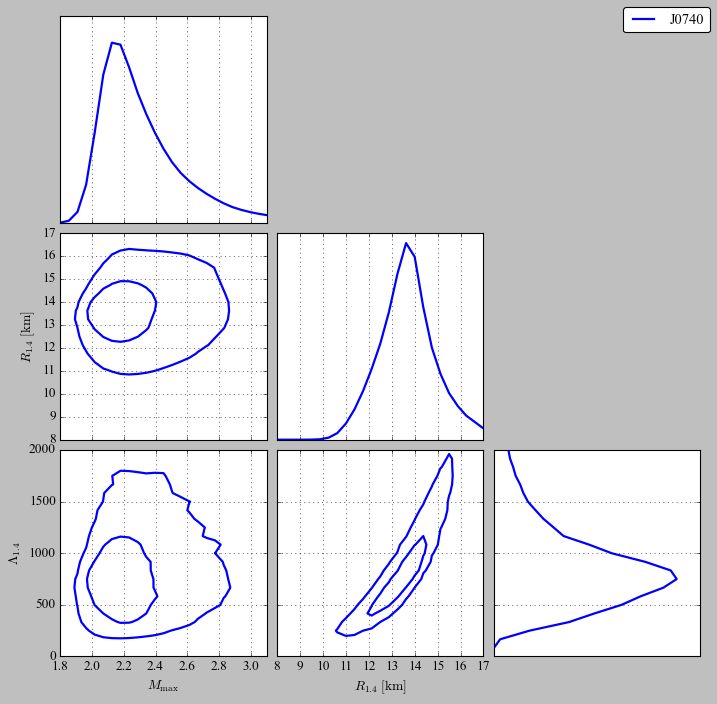

In [12]:
fig

In [11]:
mpl.__version__

'3.5.1'

In [13]:
plt.savefig("example_plot.pdf")